In [1]:
from math import pi, sqrt
from IPython.display import display

from qiskit import Aer
from qiskit import assemble
from qiskit import QuantumCircuit
#from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex

import warnings
import matplotlib.cbook
# https://stackoverflow.com/questions/24502500/python-matplotlib-getting-rid-of-matplotlib-mpl-warning
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
#FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)



In [2]:
psi_zero = [1.+0.j, 0.+0.j] # |ψ⟩ = |0⟩
psi_one = [0.+0.j, 1.+0.j] # |ψ⟩ = |1⟩
psi_plus = [1/sqrt(2), +1/sqrt(2)]  # |ψ⟩ = |+⟩
psi_minus = [1/sqrt(2), -1/sqrt(2)]  # |ψ⟩ = |-⟩
psi_i_plus = [1/sqrt(2), +1.j/sqrt(2)]  # |ψ⟩ = |i⟩
psi_i_minus = [1/sqrt(2), -1.j/sqrt(2)]  # |ψ⟩ = |-i⟩

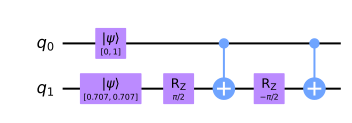

<IPython.core.display.Math object>

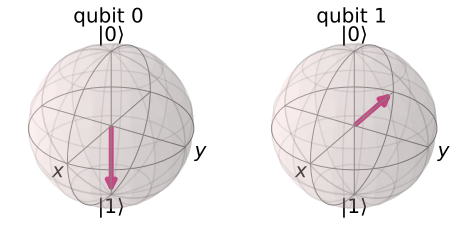

In [3]:

# 2-qbit gates, Controlled Rotations
qc = QuantumCircuit(2)
c = 0
t = 1
theta = pi # theta can be anything (pi chosen arbitrarily)

# initialize
qc.initialize(psi_one, 0)
qc.initialize(psi_plus, 1)

"""
# my_cy, Controlled Rotation on Y
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
"""

# my_cz, Controlled Rotation of target on Z by pi radians
qc.rz(theta/2, t)
qc.cx(c, t)
qc.rz(-theta/2, t)
qc.cx(c, t)


# Graph the circuit
display(qc.draw())

# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

#print("Statevector = " + str(final_state))
array_to_latex(final_state, pretext="\\text{Statevector} = ")

plot_bloch_multivector(final_state)

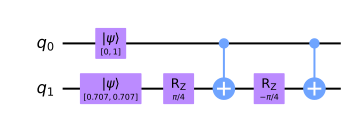

<IPython.core.display.Math object>

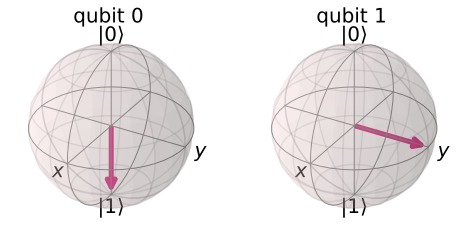

In [4]:
# 2-qbit, Controlled rotations
qc = QuantumCircuit(2)
c = 0
t = 1
theta = pi # theta can be anything (pi chosen arbitrarily)

# initialize
qc.initialize(psi_one, 0)
qc.initialize(psi_plus, 1)

"""
# my_cy, Controlled Rotation on Y
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
"""


# my_cz, Controlled Rotation on Z
qc.rz(theta/4, t)
qc.cx(c, t)
qc.rz(-theta/4, t)
qc.cx(c, t)

"""
# my_cz, Controlled Rotation on Z dagger, in reverse order?
qc.rz(-theta/4, t)
qc.cx(c, t)
qc.rz(theta/4, t)
qc.cx(c, t)
"""

# Graph the circuit
display(qc.draw())

# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

#print("Statevector = " + str(final_state))
array_to_latex(final_state, pretext="\\text{Statevector} = ")

plot_bloch_multivector(final_state)

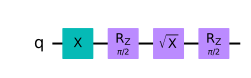

<IPython.core.display.Math object>

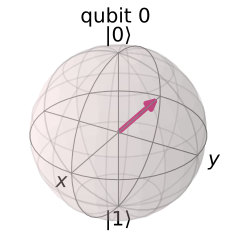

<IPython.core.display.Math object>

In [52]:
# 1-qbit gates
qc = QuantumCircuit(1)
t = 0
theta = pi # theta can be anything (pi chosen arbitrarily)

# initialize
#qc.initialize(psi_zero, 0)
qc.x(0)

####################################
### my_h, Hadamard from basic gates
qc.rz(pi/2, t)
qc.sx(t)
qc.rz(pi/2, t)
### my_h, Hadamard from basic gates
####################################

# Graph the circuit
display(qc.draw())

# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

#print("Statevector = " + str(final_state))
array_to_latex(final_state, pretext="\\text{Statevector} = ")

#usim = Aer.get_backend('unitary_simulator')
#qobj = assemble(qc)
#unitary = usim.run(qobj).result().get_unitary()
#array_to_latex(unitary, pretext="\\text{Circuit = }\n")

display(plot_bloch_multivector(final_state))

usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

In [15]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

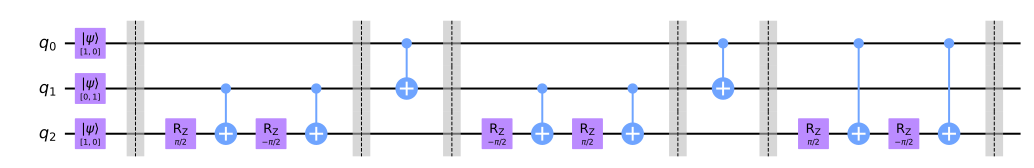

<IPython.core.display.Math object>

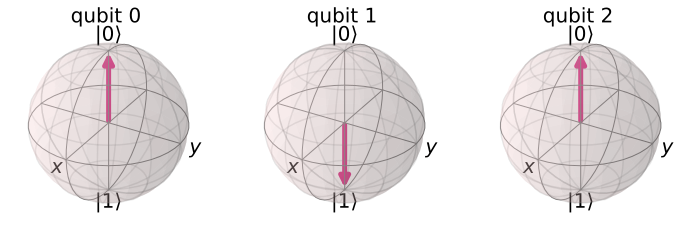

In [5]:
# Toffoli (draft #01)
qc = QuantumCircuit(3)
c1 = 0
c2 = 1
t = 2
theta = pi # theta can be anything (pi chosen arbitrarily)

# initialize
qc.initialize(psi_zero, c1)
qc.initialize(psi_one, c2)
qc.initialize(psi_zero, t)
qc.barrier()

"""
# my_cy, Controlled Rotation on Y
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
"""

# my_cz, Controlled Rotation on Z
qc.rz(theta/2, t)
qc.cx(c2, t)
qc.rz(-theta/2, t)
qc.cx(c2, t)
qc.barrier()

# CNOT c1, c2
qc.cx(c1, c2)
qc.barrier()

# my_cz, Controlled Rotation on Z
qc.rz(-theta/2, t)
qc.cx(c2, t)
qc.rz(theta/2, t)
qc.cx(c2, t)
qc.barrier()

# CNOT c1, c2
qc.cx(c1, c2)
qc.barrier()

# my_cz, Controlled Rotation on Z
qc.rz(theta/2, t)
qc.cx(c1, t)
qc.rz(-theta/2, t)
qc.cx(c1, t)
qc.barrier()


# Graph the circuit
display(qc.draw())

# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

#print("Statevector = " + str(final_state))
array_to_latex(final_state, pretext="\\text{Statevector} = ")

plot_bloch_multivector(final_state)

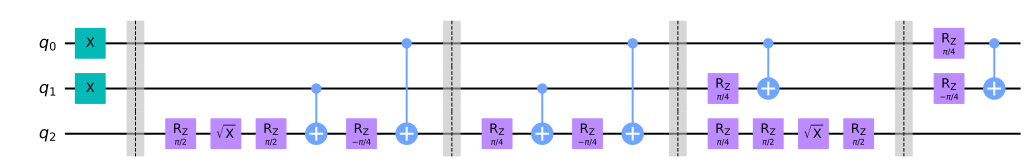

<IPython.core.display.Math object>

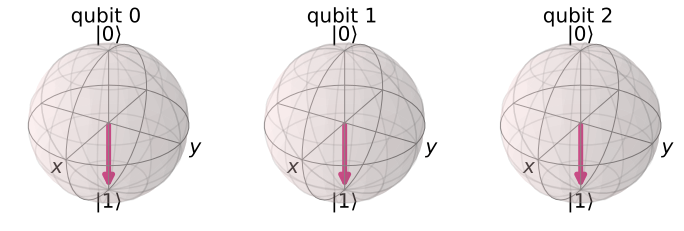

<IPython.core.display.Math object>

In [57]:
# Toffoli (draft version #02)
qc = QuantumCircuit(3)
c1 = 0
c2 = 1
t = 2
theta = pi # theta can be anything (pi chosen arbitrarily)

# initialize
#qc.initialize(psi_one, c1)
#qc.initialize(psi_one, c2)
#qc.initialize(psi_zero, t)
qc.x(c1)
qc.x(c2)
qc.barrier()

#qc.h(t)
### my_h, Hadamard from basic gates
qc.rz(pi/2, t)
qc.sx(t)
qc.rz(pi/2, t)
### my_h, Hadamard from basic gates
qc.cx(c2, t)
#qc.tdg(t)
qc.rz(-pi/4, t)
qc.cx(c1, t)
qc.barrier()

#qc.t(t)
qc.rz(pi/4, t)
qc.cx(c2, t)
#qc.tdg(t)
qc.rz(-pi/4, t)
qc.cx(c1, t)
qc.barrier()

#qc.t(c2)
qc.rz(pi/4, c2)
#qc.t(t)
qc.rz(pi/4, t)
qc.cx(c1, c2)
#qc.h(t)
### my_h, Hadamard from basic gates
qc.rz(pi/2, t)
qc.sx(t)
qc.rz(pi/2, t)
### my_h, Hadamard from basic gates
qc.barrier()

#qc.t(c1)
qc.rz(pi/4, c1)
#qc.tdg(c2)
qc.rz(-pi/4, c2)
qc.cx(c1, c2)

# Graph the circuit
display(qc.draw())

# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

#print("Statevector = " + str(final_state))
array_to_latex(final_state, pretext="\\text{Statevector} = ")

display(plot_bloch_multivector(final_state))

usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

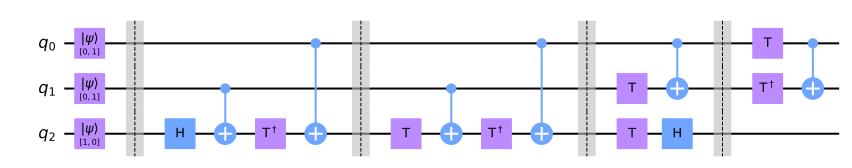

<IPython.core.display.Math object>

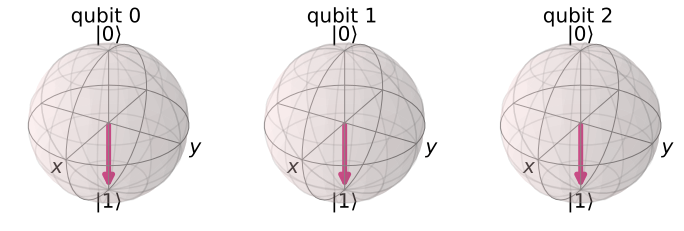

In [6]:
# Toffoli (working version)
qc = QuantumCircuit(3)
c1 = 0
c2 = 1
t = 2
theta = pi # theta can be anything (pi chosen arbitrarily)

# initialize
qc.initialize(psi_one, c1)
qc.initialize(psi_one, c2)
qc.initialize(psi_zero, t)
qc.barrier()

qc.h(t)
qc.cx(c2, t)
qc.tdg(t)
qc.cx(c1, t)
qc.barrier()

qc.t(t)
qc.cx(c2, t)
qc.tdg(t)
qc.cx(c1, t)
qc.barrier()

qc.t(c2)
qc.t(t)
qc.cx(c1, c2)
qc.h(t)
qc.barrier()

qc.t(c1)
qc.tdg(c2)
qc.cx(c1, c2)

# Graph the circuit
display(qc.draw())

# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

#print("Statevector = " + str(final_state))
array_to_latex(final_state, pretext="\\text{Statevector} = ")

plot_bloch_multivector(final_state)

<IPython.core.display.Math object>

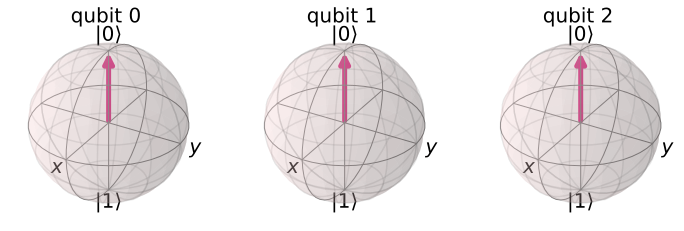

<IPython.core.display.Math object>

In [59]:
# Toffoli, submission to Challange
# You can also build your circuit programmatically using Qiskit code

#circuit = QuantumCircuit(3)

# WRITE YOUR CODE BETWEEN THESE LINES - START
my_qc = QuantumCircuit(3)
c1 = 0
c2 = 1
t = 2

# initialize
#my_qc.initialize(psi_one, c1)
#my_qc.initialize(psi_one, c2)
#my_qc.initialize(psi_zero, t)
#my_qc.x(c1)
#my_qc.x(c2)
#my_qc.barrier()

#my_qc.h(t)
### my_h, Hadamard from basic gates
my_qc.rz(pi/2, t)
my_qc.sx(t)
my_qc.rz(pi/2, t)
### my_h, Hadamard from basic gates
my_qc.cx(c2, t)
#my_qc.tdg(t)
my_qc.rz(-pi/4, t)
my_qc.cx(c1, t)
#my_qc.barrier()

#my_qc.t(t)
my_qc.rz(pi/4, t)
my_qc.cx(c2, t)
#my_qc.tdg(t)
my_qc.rz(-pi/4, t)
my_qc.cx(c1, t)
#my_qc.barrier()

#my_qc.t(c2)
my_qc.rz(pi/4, c2)
#my_qc.t(t)
my_qc.rz(pi/4, t)
my_qc.cx(c1, c2)
#my_qc.h(t)
### my_h, Hadamard from basic gates
my_qc.rz(pi/2, t)
my_qc.sx(t)
my_qc.rz(pi/2, t)
### my_h, Hadamard from basic gates
#my_qc.barrier()

#my_qc.t(c1)
my_qc.rz(pi/4, c1)
#my_qc.tdg(c2)
my_qc.rz(-pi/4, c2)
my_qc.cx(c1, c2)

# Graph the circuit
my_qc.draw()

# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(my_qc)
final_state = svsim.run(qobj).result().get_statevector()

#print("Statevector = " + str(final_state))
array_to_latex(final_state, pretext="\\text{Statevector} = ")

display(plot_bloch_multivector(final_state))

usim = Aer.get_backend('unitary_simulator')
qobj = assemble(my_qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")